In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA



In [7]:
df = pd.read_csv("heart.csv")

In [8]:


# Columns to handle outliers
outlier_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

#detect Outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

#  remove Outliers
df_iqr = df.copy()
for col in outlier_cols:
    low, high = detect_outliers_iqr(df_iqr, col)
    df_iqr = df_iqr[(df_iqr[col] >= low) & (df_iqr[col] <= high)]

print(" Shape after IQR removal:", df_iqr.shape)

#  Winsorization
df_winsor = df.copy()
for col in outlier_cols:
    df_winsor[col] = winsorize(df_winsor[col], limits=[0.05, 0.05])  # cap bottom/top 5%

print(" Shape after Winsorization:", df_winsor.shape)

 Shape after IQR removal: (964, 14)
 Shape after Winsorization: (1025, 14)


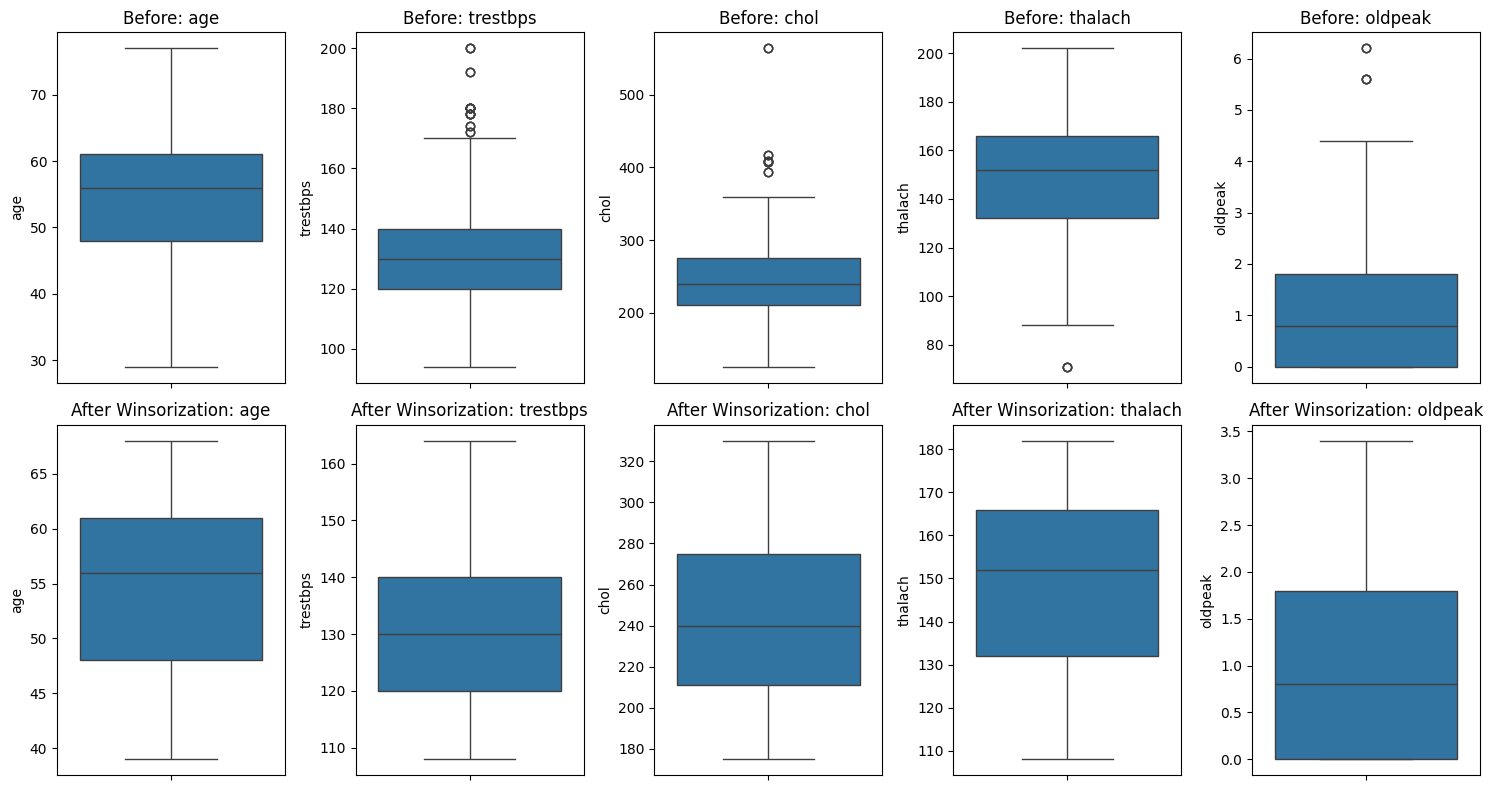

In [9]:
#Visulization
plt.figure(figsize=(15,8))

for i, col in enumerate(outlier_cols, 1):
    # Before
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f"Before: {col}")

    # After Winsorization
    plt.subplot(2, 5, i+5)
    sns.boxplot(y=df_winsor[col])
    plt.title(f"After Winsorization: {col}")

plt.tight_layout()
plt.show()


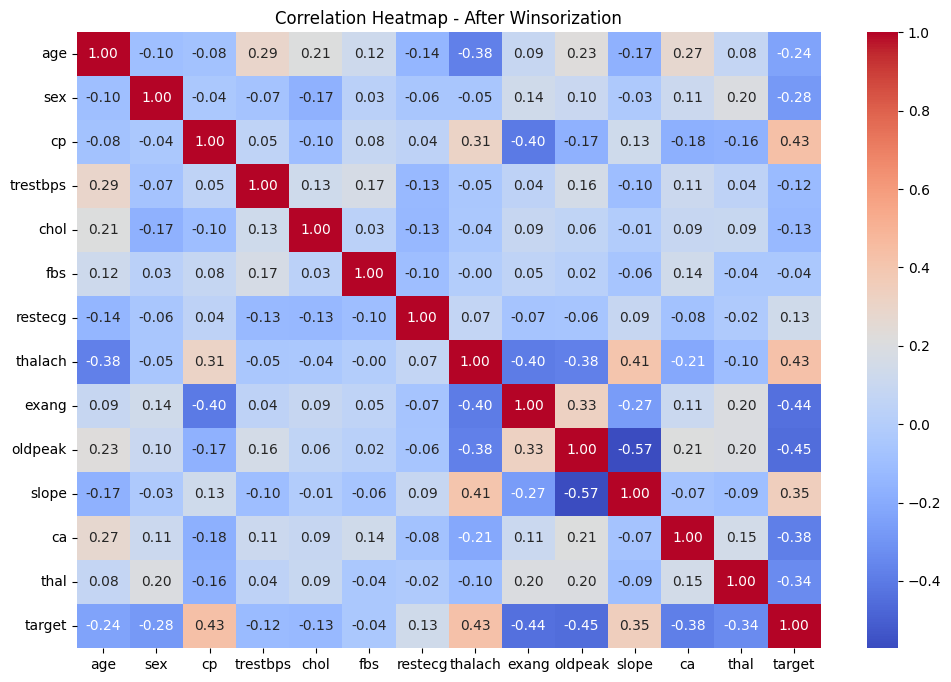

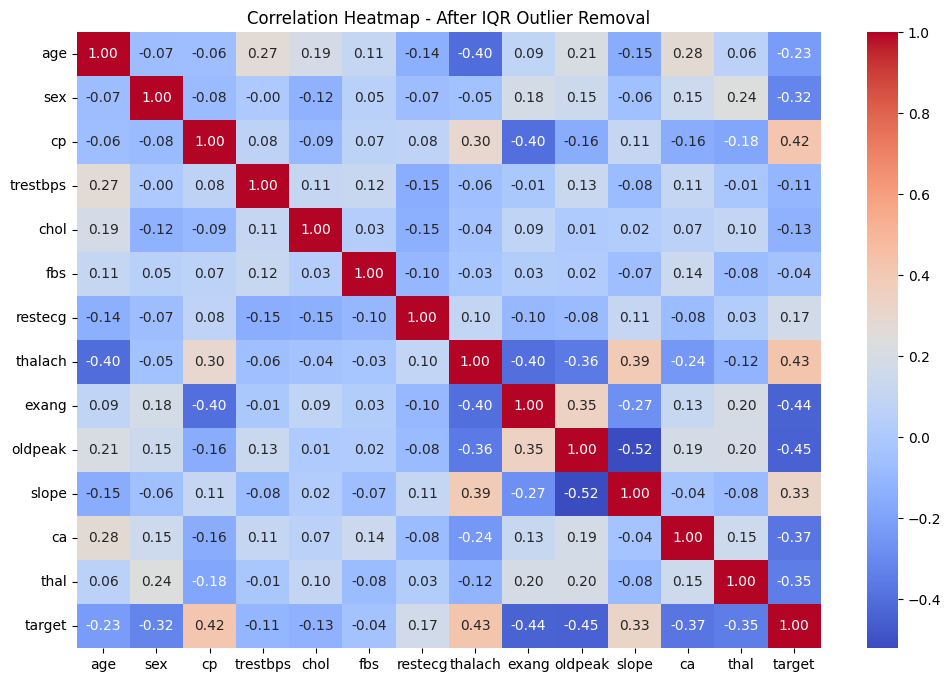

In [10]:
# Heatmap after Winsorization (outliers capped)
plt.figure(figsize=(12,8))
sns.heatmap(df_winsor.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - After Winsorization")
plt.show()

#  Heatmap after IQR removal (outliers removed)
plt.figure(figsize=(12,8))
sns.heatmap(df_iqr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - After IQR Outlier Removal")
plt.show()